<a href="https://colab.research.google.com/github/NireAstro/1221-dark-matter/blob/main/Gravitational_Waves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as ac

In [ ]:
# In-Class Demo

$R_{bh} = \sqrt\frac{GM_⊙}{c^2}$

In [ ]:
M_bh = 1 * u.solMass
R_bh = 2 * ac.G * M_bh / ac.c**2
print("The radius of a solar-mass black hole is ", R_bh.to(u.km))

The radius of a solar-mass black hole is  2.95325007610025 km


$M_{Total} = \frac{δtc^3}{16πG}$

In [ ]:
delta_t = 0.01 * u.second
M_bh_total = delta_t * ac.c**3 / (16 * np.pi * ac.G)
print("Total mass of the merging black holes is", M_bh_total.to(u.solMass))

Total mass of the merging black holes is 40.390629275268466 solMass


In [ ]:
h = 1e-21
delta_Earth = 1 * u.earthRad * h
print("Deformation of Earth is", delta_Earth.to(u.nm))

Deformation of Earth is 6.378099999999999e-06 nm


h = R_bh / distance, so distance = R_bh / h

In [ ]:
R_bh = 2 * ac.G * 30 * u.solMass / (ac.c**2)
D = R_bh / h
print("Distance of the black hole merger is", D.to(1e6 * u.parsec))

Distance of the black hole merger is 2871.249504952705 1e+06 pc


In [ ]:
# My Code -- GW170817 (Neutron Star Mergers)

In [ ]:
 pip install gwpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp310-cp310-linux_x86_64.whl size=99256 sha256=1df3d638892b501e1b16262a366bb0f76794f96de81556379a11ea5ca40776a2
  Stored in directory: /root/.cache/pip/wheels/6d/48/d1/3466977be4e41ba57f92ad0d5619f083df43cf319a151c4e06
Successfully built ligo-segments


In [ ]:
t0 = 1187008882.4

from gwpy.timeseries import TimeSeries
hdata = TimeSeries.fetch_open_data('H1', t0 - 16, t0 + 16)

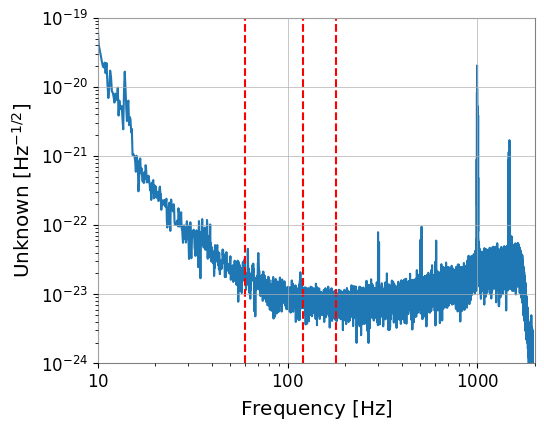

In [ ]:
fig2 = hdata.asd(fftlength=8).plot()

plt.xlim(10,2000)
ymin = 1e-24
ymax = 1e-19
plt.ylim(ymin, ymax)
plt.vlines(60, ymin, ymax, linestyle="dashed", color="red")
plt.vlines(120, ymin, ymax, linestyle="dashed", color="red")
plt.vlines(180, ymin, ymax, linestyle="dashed", color="red")

In [ ]:
from gwpy.signal import filter_design
bp = filter_design.bandpass(50, 250, hdata.sample_rate)

notches = [filter_design.notch(line, hdata.sample_rate) for
           line in (60, 120, 180)]

zpk = filter_design.concatenate_zpks(bp, *notches)

hfilt = hdata.filter(zpk, filtfilt=True)

In [ ]:
hdata = hdata.crop(*hdata.span.contract(1))
hfilt = hfilt.crop(*hfilt.span.contract(1))

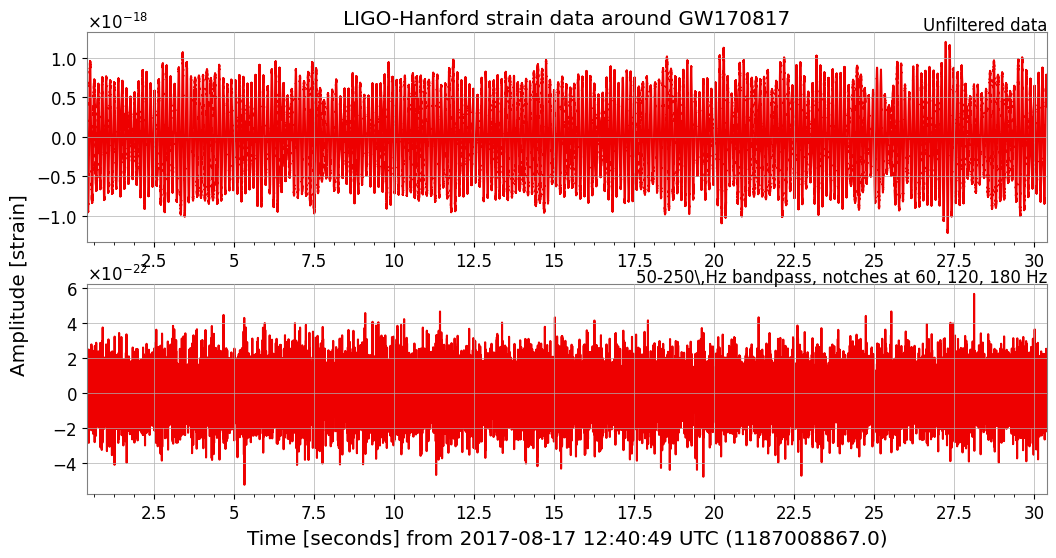

In [ ]:
from gwpy.plot import Plot
plot = Plot(hdata, hfilt, figsize=[12, 6], separate=True, sharex=True,
            color='gwpy:ligo-hanford')
ax1, ax2 = plot.axes
ax1.set_title('LIGO-Hanford strain data around GW170817')
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')
ax1.set_ylabel('Amplitude [strain]', y=-0.2)
ax2.set_ylabel('')
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 60, 120, 180 Hz',
         transform=ax2.transAxes, ha='right')
plot.show()

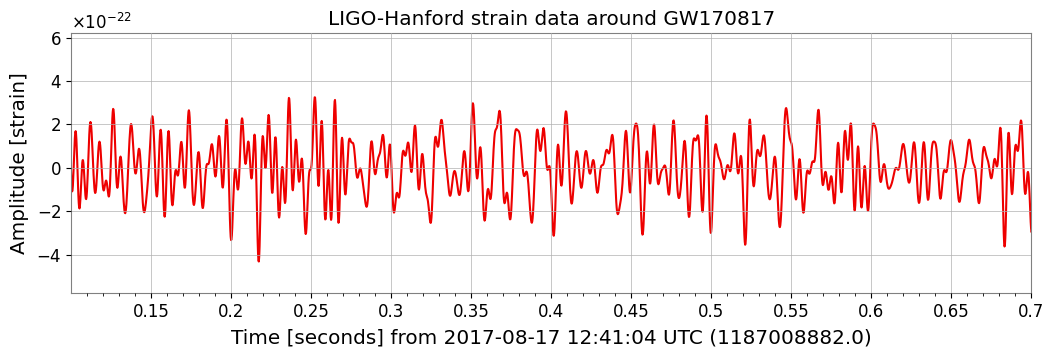

In [ ]:
plot = hfilt.plot(color='gwpy:ligo-hanford')
ax = plot.gca()
ax.set_title('LIGO-Hanford strain data around GW170817')
ax.set_ylabel('Amplitude [strain]')
ax.set_xlim(t0 - 0.3, t0 + 0.3)
ax.set_xscale('seconds', epoch=1187008882)
plot.show()

x_val = plt.gca().lines[0].get_xdata()
y_val = plt.gca().lines[0].get_ydata()

In [ ]:
ldata = TimeSeries.fetch_open_data('L1', t0 - 16, t0 + 16) # L refers to another LIGO station that also detects gws.
lfilt = ldata.filter(zpk, filtfilt=True)

In [ ]:
lfilt.shift('6.9ms')
lfilt *= -1

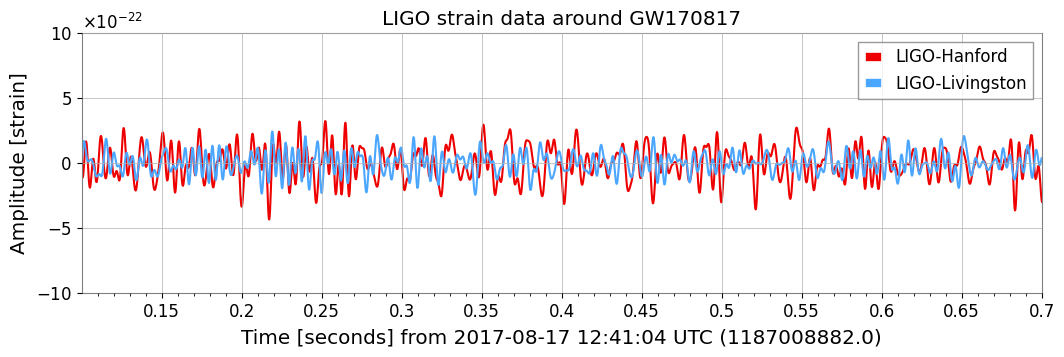

In [ ]:
plot = Plot(figsize=[12, 4])
ax = plot.gca()
ax.plot(hfilt, label='LIGO-Hanford', color='gwpy:ligo-hanford')
ax.plot(lfilt, label='LIGO-Livingston', color='gwpy:ligo-livingston')
ax.set_title('LIGO strain data around GW170817')
ax.set_xlim(t0 - 0.3, t0 + 0.3)
ax.set_xscale('seconds', epoch=1187008882)
ax.set_ylabel('Amplitude [strain]')
ax.set_ylim(-1e-21, 1e-21)
ax.legend()
plot.show()

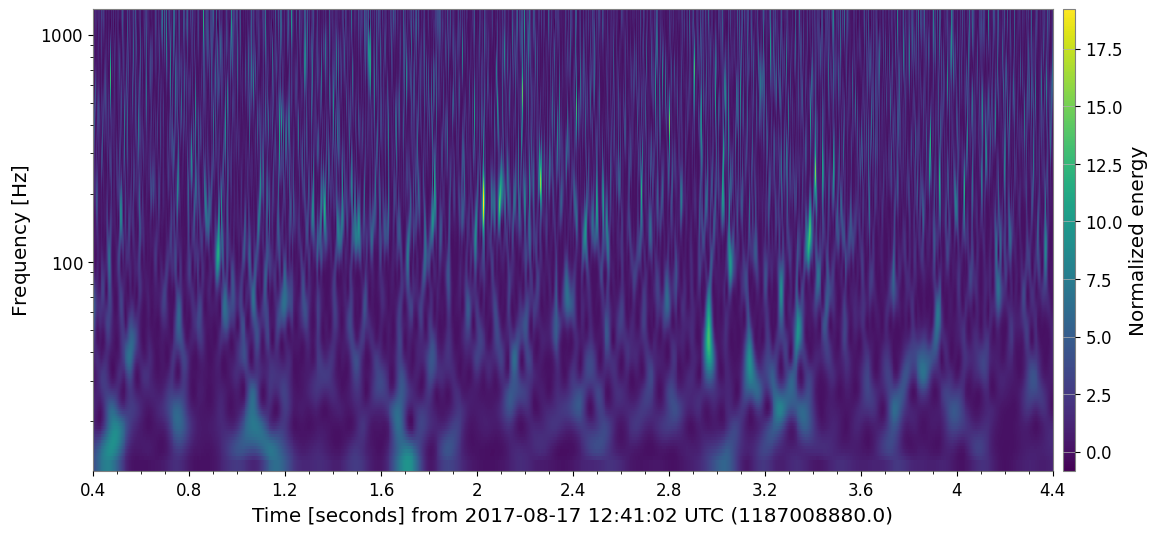

In [ ]:
dt = 2
hq = hfilt.q_transform(outseg=(t0 - dt, t0 + dt))
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalized energy")
ax.grid(False)
ax.set_yscale('log')

In [ ]:
from scipy.io.wavfile import write
import numpy as np

In [ ]:
# GW200224_222234

In [ ]:
t0 = 1266618172.4
from gwpy.timeseries import TimeSeries
hdata = TimeSeries.fetch_open_data('H1', t0 - 16, t0 + 16)

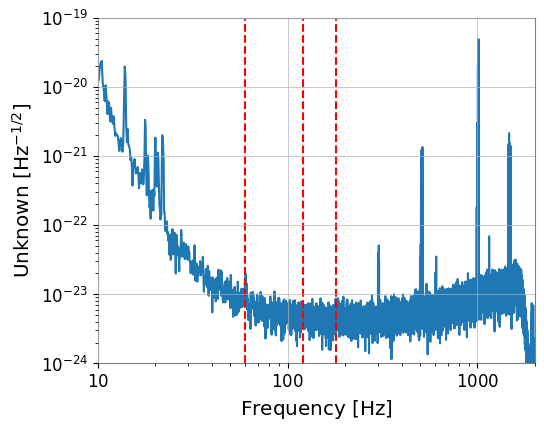

In [ ]:
fig2 = hdata.asd(fftlength=8).plot()
plt.xlim(10,2000)
ymin = 1e-24
ymax = 1e-19
plt.ylim(ymin, ymax)
plt.vlines(60, ymin, ymax, linestyle="dashed", color="red")
plt.vlines(120, ymin, ymax, linestyle="dashed", color="red")
plt.vlines(180, ymin, ymax, linestyle="dashed", color="red")

In [ ]:
from gwpy.signal import filter_design
bp = filter_design.bandpass(50, 250, hdata.sample_rate)
notches = [filter_design.notch(line, hdata.sample_rate) for
            line in (60, 120, 180)]

zpk = filter_design.concatenate_zpks(bp, *notches)

hfilt = hdata.filter(zpk, filtfilt=True)

In [ ]:
hdata = hdata.crop(*hdata.span.contract(1))
hfilt = hfilt.crop(*hfilt.span.contract(1))

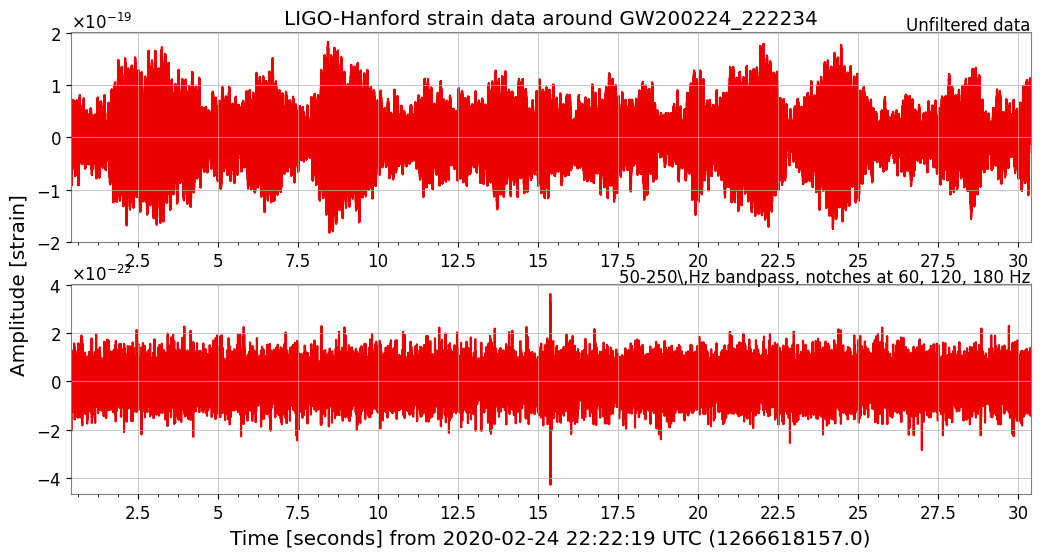

In [ ]:
from gwpy.plot import Plot
plot = Plot(hdata, hfilt, figsize=[12, 6], separate=True, sharex=True,
            color='gwpy:ligo-hanford')
ax1, ax2 = plot.axes
ax1.set_title('LIGO-Hanford strain data around GW200224_222234')
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')
ax1.set_ylabel('Amplitude [strain]', y=-0.2)
ax2.set_ylabel('')
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 60, 120, 180 Hz',
         transform=ax2.transAxes, ha='right')
plot.show()

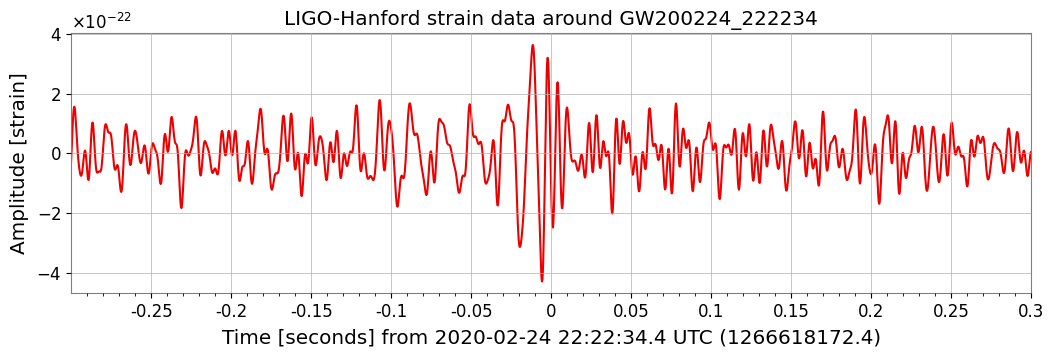

In [ ]:
import matplotlib.pyplot as plt

plot = hfilt.plot(color='gwpy:ligo-hanford') # plotting the filtered data
ax = plot.gca()
ax.set_title('LIGO-Hanford strain data around GW200224_222234')
ax.set_ylabel('Amplitude [strain]')
ax.set_xlim(t0 - 0.3, t0 + 0.3) # -- (t0 - 0.3, t0 + 0.3) -- zoom in to center around t0.
ax.set_xscale('seconds', epoch=1266618172.4) # set a scale, you can also replace the number for epoch as t0.
plot.show()

x_val = plt.gca().lines[0].get_xdata()
y_val = plt.gca().lines[0].get_ydata()


In [ ]:
ldata = TimeSeries.fetch_open_data('L1', t0 - 16, t0 + 16) # L refers to another LIGO station that also detects gws.
lfilt = ldata.filter(zpk, filtfilt=True)

In [ ]:
lfilt.shift('6.9ms') # L detects the sam gw wave at a different time.
lfilt *= -1

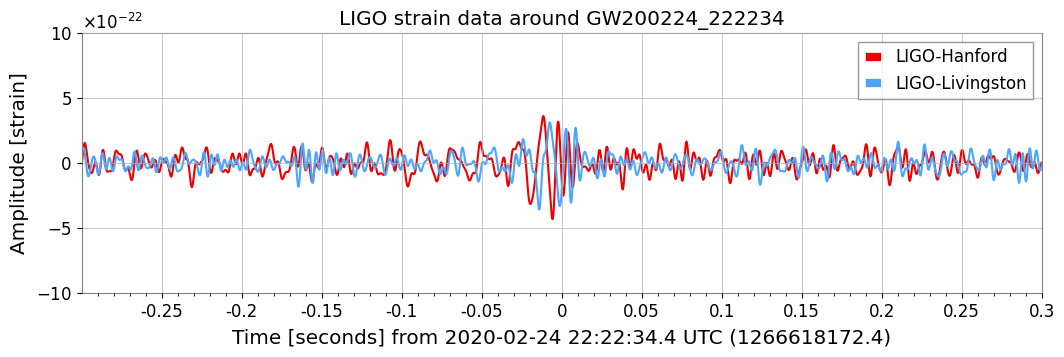

In [ ]:
plot = Plot(figsize=[12, 4])
ax = plot.gca()
ax.plot(hfilt, label='LIGO-Hanford', color='gwpy:ligo-hanford') # Shows the data for both stations.
ax.plot(lfilt, label='LIGO-Livingston', color='gwpy:ligo-livingston')
ax.set_title('LIGO strain data around GW200224_222234')
ax.set_xlim(t0 - 0.3, t0 + 0.3)
ax.set_xscale('seconds', epoch=1266618172.4)
ax.set_ylabel('Amplitude [strain]')
ax.set_ylim(-1e-21, 1e-21)
ax.legend()
plot.show()

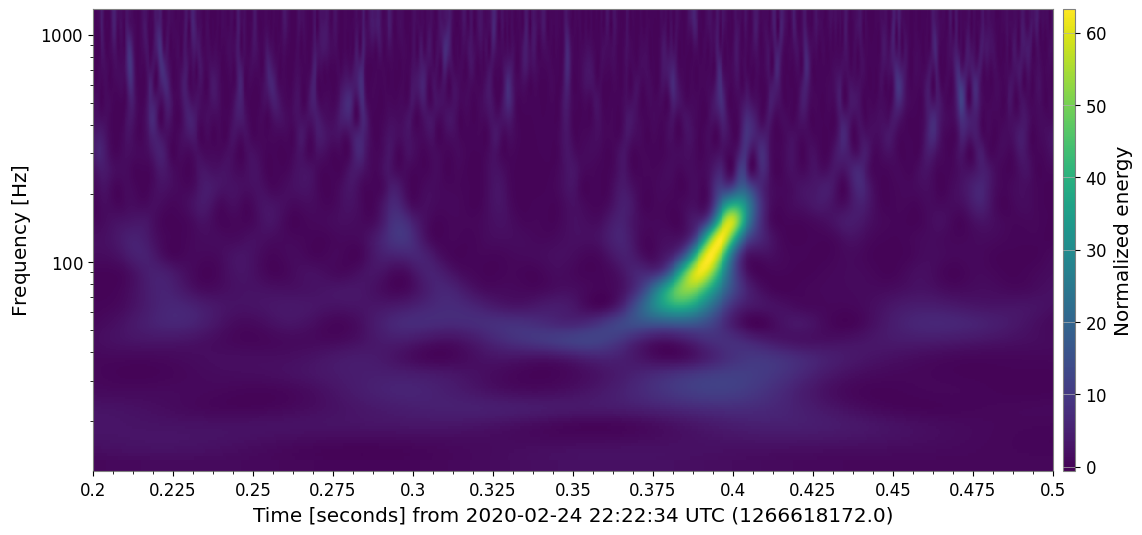

In [ ]:
dt = 0.2  #-- Set width of q-transform plot, in seconds
hq = hfilt.q_transform(outseg=(t0-dt, t0+0.1))
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalized energy")
ax.grid(False)
ax.set_yscale('log')
# Note: shows the intensity and frequency of the gw.

In [ ]:
from scipy.io.wavfile import write
import numpy as np

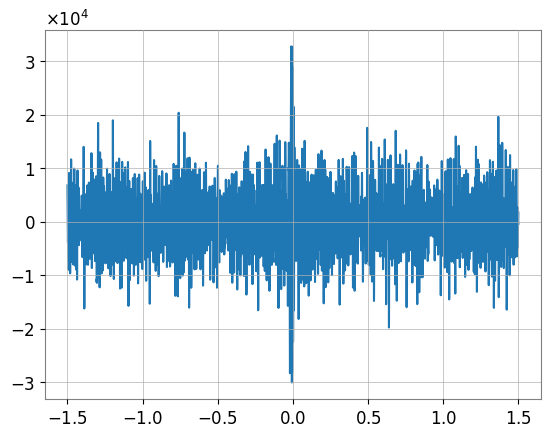

In [ ]:
# turn our data into a sound file
amplitude = np.iinfo(np.int16).max

ind = np.where((x_val < (t0+1.5)) & (x_val > (t0-1.5))) # x-val will help to select an array entered on t0
y = y_val[ind] #mas y-val is at max amplitude
# y = y**3
y = y / np.max(y)
plt.plot(x_val[ind] - t0, (np.array(y) * amplitude).astype(np.int16))

In [ ]:
fs = int(1 / np.median(np.diff(np.array(x_val[ind] - t0)))) # sampling rate
print("fs = ", fs)
write("GW200224_222234.wav", fs, (np.array(y) * amplitude).astype(np.int16))

fs =  4096


0.5
fs =  4096


<ipython-input-34-507475291dcb>:39: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.plot(x - t0, (np.array(y_old) * amplitude).astype(np.int16), label="before frequency multiplication")
<ipython-input-34-507475291dcb>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.plot(x - t0, (np.array(y) * amplitude).astype(np.int16), label="after frequency multiplication")
<ipython-input-34-507475291dcb>:54: ComplexWarning: Casting complex values to real discards the imaginary part
  write("example_fft.wav", fs, (np.array(y[0:int(num/up_sample)]) * amplitude).astype(np.int16))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

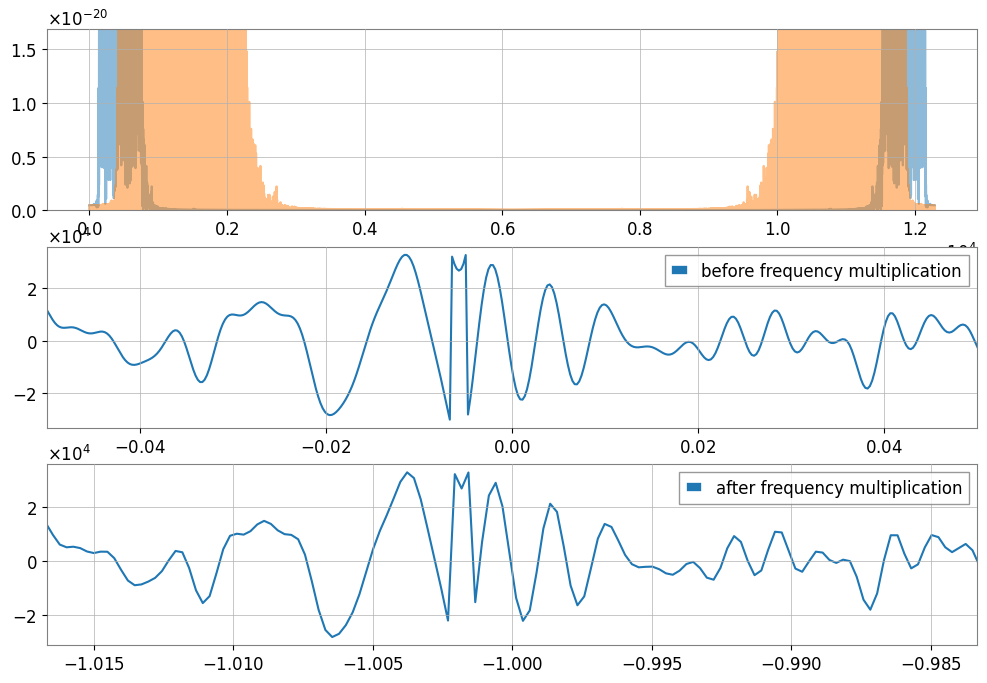

In [ ]:
t_clip = 1.5 # defining the width of the signal that we're using.
amplitude = np.iinfo(np.int16).max

ind = np.where((x_val < (t0+t_clip)) & (x_val > (t0-t_clip))) # selecting specific regions within the 3 seconds that fulfill the conditions where time is less that t0+1.5, but greater than t0-1.5.
x = x_val[ind] # setting our x-values(time)
y = y_val[ind] # setting our t-values(amplitude)
# plt.plot(x - t0, (np.array(y / np.max(y)) * amplitude) + 10000, label="oringinal")
# print(np.min(np.array(y / np.max(y)) * amplitude), np.max(np.array(y / np.max(y)) * amplitude))

up_sample = 3 # adding more cycles in between frequencies, which stretches out the sound without affecting the pitch

y_fft = np.fft.fft(y) # taking the fourier transform of our data
y_fft_new = np.zeros(np.shape(y_fft), dtype=np.cdouble)
y_fft_old = y_fft

num = len(y_fft) # defining a variable for the length of the fourier transform data
for i in np.arange(int(num / up_sample)): # making a list that is dividing the length by the number of cycles we added.
    y_fft_new[int(i * up_sample)] = y_fft[int(i)]

y_old = np.fft.ifft(y_fft_old)

for i in np.arange(num):
  if i > (num / 2):
    y_fft_new[i] = np.conjugate(y_fft_new[int(num) - i])

# y_fft_new = np.fft.fftshift(y_fft_new)
y = np.fft.ifft(y_fft_new)

plt.figure(figsize=(12,8))
plt.subplot(311)
plt.plot(np.abs(y_fft_old), alpha=0.5) # graph before the fourier transform (blue)
plt.plot(np.abs(y_fft_new), alpha=0.5) # graph after the fourier transform (orange)
ylim = np.percentile(np.abs(y_fft), 95)
plt.ylim(0, ylim)

plt.subplot(312)
# y_old = y_old**3 # to make the signal more distinct from the noise
y_old = y_old / np.max(y_old)
plt.plot(x - t0, (np.array(y_old) * amplitude).astype(np.int16), label="before frequency multiplication")
plt.xlim(-0.05, 0.05)
plt.legend()

plt.subplot(313)
# y = y**3 # to make the signal more distinct from the noise
y = y / np.max(y)
plt.plot(x - t0, (np.array(y) * amplitude).astype(np.int16), label="after frequency multiplication")
plt.xlim(-t_clip + t_clip / up_sample - 0.05 / up_sample, -t_clip + t_clip / up_sample + 0.05 / up_sample)
plt.legend()
print(t_clip / up_sample)

fs = int(1 / np.median(np.diff(np.array(x_val[ind] - t0))))
# fs = fs * 4 # to make the signal higher pitch
print("fs = ", fs)
write("example_fft.wav", fs, (np.array(y[0:int(num/up_sample)]) * amplitude).astype(np.int16))

from google.colab import files
files.download("example_fft.wav")

In [ ]:
# Showing the og data, old fft data and new fft data
print(y_fft[0:4], y_fft[-3:])
print(y_fft_new[0:10], y_fft_new[-3:])
print(y_fft_old[0:4], y_fft_old[-3:])

[-4.81708627e-22+0.00000000e+00j -4.81716557e-22+3.43930128e-25j
 -4.81740348e-22+6.87758388e-25j -4.81780011e-22+1.03138304e-24j] [-4.81780011e-22-1.03138304e-24j -4.81740348e-22-6.87758388e-25j
 -4.81716557e-22-3.43930128e-25j]
[-4.81708627e-22+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j -4.81716557e-22+3.43930128e-25j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
 -4.81740348e-22+6.87758388e-25j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j -4.81780011e-22+1.03138304e-24j] [-4.81716557e-22-3.43930128e-25j  0.00000000e+00-0.00000000e+00j
  0.00000000e+00-0.00000000e+00j]
[-4.81708627e-22+0.00000000e+00j -4.81716557e-22+3.43930128e-25j
 -4.81740348e-22+6.87758388e-25j -4.81780011e-22+1.03138304e-24j] [-4.81780011e-22-1.03138304e-24j -4.81740348e-22-6.87758388e-25j
 -4.81716557e-22-3.43930128e-25j]


In [ ]:
# Installing a package which will allow us to manipulate sound files
!pip install pydub
from pydub import AudioSegment

In [ ]:
# Slowing down the sound, which also decrease the sound file by 1 second
sound = AudioSegment.from_file("example_fft.wav")
print(sound.frame_rate)
# sound.frame_rate = 1024
print(sound.frame_rate)
sound = sound.set_frame_rate(4096 * 4)
sound.frame_rate = 4096 * 2
sound.export("example_slow.wav")
files.download("example_slow.wav")

4096
4096


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("GW200224_222234.wav")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#import librosa
#librosa.get_duration(filename='GW200224_222234.wav')

<ipython-input-39-d59cc800fe79>:2: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.get_duration(filename='GW200224_222234.wav')


3.0

In [ ]:
#PATH = "GW200224_222234.wav"
#original_audio, sample_rate = librosa.load(PATH)

In [ ]:
#rate = 1.0
#augmented_audio = librosa.effects.time_stretch(original_audio, rate = rate)

(0.0, 0.1)

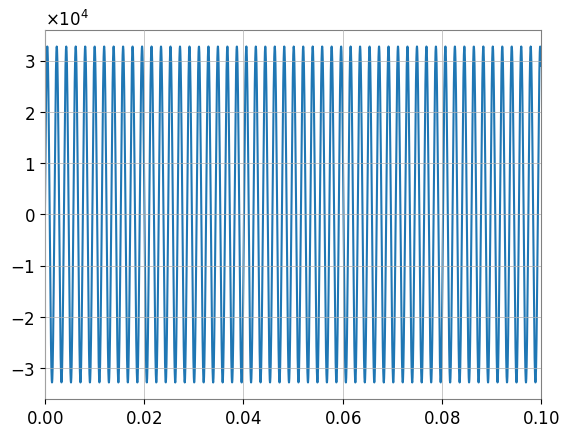

In [ ]:
samplerate = 44100; fs = 261.63 * 2.0 # C key (pitch)
t = np.linspace(0., 1., samplerate) # how many segments to break a second into.
amplitude = np.iinfo(np.int16).max # how loud it will be
data = amplitude * np.sin(2. * np.pi * fs * t) # to make a sound youhave to make a wave
plt.plot(t, data) # visualize the data
plt.xlim(0, 0.1)

In [ ]:
write("C.wav", samplerate, data.astype(np.int16))
files.download("C.wav")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>